In [6]:
import numpy as np
import matplotlib.pyplot as plt

def phi(t, x):
    return np.abs(t - x)

def create_grid(eps=0.01, m=100):
    if eps != 0.01:
        m = int(1.0 / eps)
    elif m == 100:
        eps = 1.0 / m
    T = np.linspace(0.0, 1.0, m+1)
    return T


def mixture(weights, bias = 0):
    ts = create_grid(m = len(weights)-1)
    def mixture_function(x):
        return np.sum([w * phi(t, x) for w, t in zip(weights, ts)]) + bias
    return mixture_function

def plot_mixture(mixture):
    x = np.linspace(0, 1, 1000)
    y = [f(xi) for xi in x]
    plt.plot(x, y)
    plt.show()

def log_posterior(w, X, Y, T):
    residuals = []
    for x_u, y_u in zip(X, Y):
        pred_u = np.sum(w * phi(T, x_u))
        residuals.append((y_u - pred_u)**2)
    nll = 0.5 * np.sum(residuals)
    prior = 0.5 * np.sum(w**2)
    return -(nll + prior)

def in_domain(w, B):
    if np.any(w < 0):
        return False
    if np.sum(w) > B:
        return False
    return True


In [22]:
def hit_and_run_sampling(X, Y, T, w_init, n_samples, B,
                         burn_in=1000, step_scale=1.0,
                         ):
    latent_dim = len(w_init)
    data_dim = len(X)

    # Change the coordinate system so that the distribution is standard normal
    X = np.array(X)[:, np.newaxis]
    Y = np.array(Y)[:, np.newaxis]
    print(X.shape, Y.shape)
    print(np.linalg.inv(np.eye(data_dim) + X @ X.T).shape)
    print(X.T.shape)
    posterior_mean = np.linalg.inv(np.eye(dim) + X @ X.T) @ X.T @ w_init

    w_current = np.array(w_init, dtype=float)
    samples = []

    if not in_domain(w_current, B):
        raise ValueError("Initial point w_init not in feasible domain S.")

    logp_current = log_density_func(w_current)

    total_steps = burn_in + n_samples
    for i in range(total_steps):
        # direction = rng.normal(size=dim)
        # direction /= np.linalg.norm(direction)

        # alpha_min, alpha_max = find_feasible_alpha_range(w_current, direction, B)

        # Choose a random coordinate direction
        coord = rng.randint(0, dim)
        # Choose a possible variation in the coordinate direction
        max_w = B - np.sum(w_current) + w_current[coord]
        min_w = -w_current[coord]

        proposal_change = rng.uniform(min_w, max_w)
        proposal_vector = proposal_change * (np.eye(dim)[coord])
        w_proposal = w_current + proposal_vector

        # if alpha_min >= alpha_max:
        #     print(alpha_min, alpha_max, i)
        #     continue

        # alpha_proposal = rng.uniform(alpha_min, alpha_max)
        # w_proposal = w_current + alpha_proposal * direction

        logp_proposal = log_density_func(w_proposal)
        log_accept_ratio = logp_proposal - logp_current
        if np.log(rng.random()) < log_accept_ratio:
            w_current = w_proposal
            logp_current = logp_proposal

        if i >= burn_in:
            samples.append(w_current.copy())

    return samples

def find_feasible_alpha_range(w, d, B):
    dim = len(w)
    alpha_min = -np.inf
    alpha_max = np.inf

    for i in range(dim):
        if d[i] > 1e-15:
            alpha_min = max(alpha_min, -w[i]/d[i])
        elif d[i] < -1e-15:
            alpha_max = min(alpha_max, -w[i]/d[i])

    sum_w = np.sum(w)
    sum_d = np.sum(d)
    if abs(sum_d) > 1e-15:
        c = (B - sum_w) / sum_d
        if sum_d > 0:
            alpha_max = min(alpha_max, c)
        else:
            alpha_min = max(alpha_min, c)
    else:
        pass

    return alpha_min, alpha_max

samples = hit_and_run_sampling(X_data, Y_data, T, w_init, 100, 10, burn_in=1000, step_scale=1.0)

(200, 1) (200, 1)
(200, 200)
(1, 200)


ValueError: operands could not be broadcast together with shapes (101,101) (200,200) 

In [13]:
samples = hit_and_run_sampling(X_data, Y_data, T, w_init, n_samples, B, burn_in=1000, step_scale=1.0)
plt.scatter(X_data, Y_data)

NameError: name 'n_samples' is not defined

AttributeError: 'list' object has no attribute 'shape'

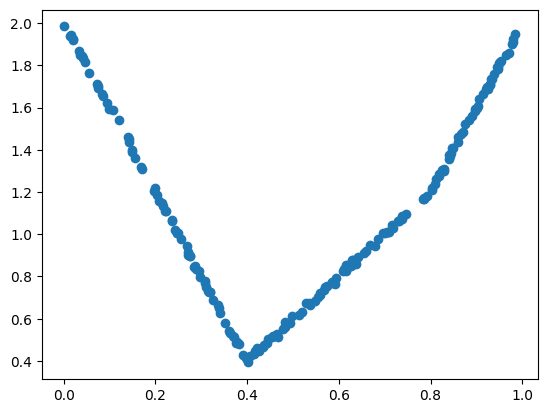

In [9]:
# Regression
eps = 0.01
T = create_grid(eps=eps)
dim = len(T)

# Generate data
true_f = mixture([0,0,0,0,3,0,0,0,1,0,0])
n_obs = 200
rng = np.random.default_rng()
X_data = rng.uniform(0, 1, size=n_obs)
Y_data = [true_f(x) + 0.01*rng.normal() for x in X_data]  # small noise
# Plot the data
plt.scatter(X_data, Y_data)

B = 10.0
w_init = (np.ones(dim)/dim) * (B/2)
samples = hit_and_run_sampling(X_data, Y_data, T, w_init, n_samples=20, B=B, burn_in=10000, step_scale=1.0)

x = np.linspace(0, 1, 1000)
y = [true_f(xi) for xi in x]
plt.plot(x, y)
for w in samples:
    f = mixture(w)
    y = [f(xi) for xi in x]
    plt.plot(x, y, alpha=0.1)
plt.show()

w_sample = samples[-1]

test_xs = np.linspace(0, 1, 200)
losses = []
for x_ in test_xs:
    val = np.sum(w_sample * phi(T, x_))
    losses.append(val)
best_x = test_xs[np.argmin(losses)]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


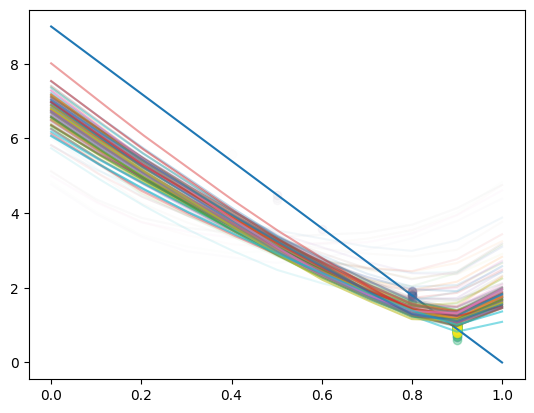

In [134]:
# Thompson sampling
eps = 0.1
T = create_grid(eps=eps)
dim = len(T)
true_f = mixture([0,0,0,0,0,0,0,0,0,0,9])
B = 10.0
w_init = (np.ones(dim)/dim) * (B/2)

X_data = []
Y_data = []
f_data = []
n_rounds = 100
for r in range(n_rounds):
    print(r)
    # sample a function
    def log_post(w):
        return log_posterior(w, X_data, Y_data, T)
    w_init = (np.random.uniform(0, 1, size=dim))
    w_init = w_init / np.sum(w_init) * B/2

    f = hit_and_run_sampling(log_post, w_init, n_samples=1, B=B, burn_in=2000, step_scale=1.0, random_state=42)
    f = mixture(f[0])
    f_data.append(f)

    # optimize for action
    test_xs = T.copy()
    losses = []
    for x_ in test_xs:
        val = f(x_)
        losses.append(val)
    best_x = np.argmin(losses) *eps
    X_data.append(best_x)

    # observe reward
    reward = true_f(best_x) + 0.1*rng.normal()
    Y_data.append(reward)


# plot all the actions and the true function
x = np.linspace(0, 1, 1000)
y = [true_f(xi) for xi in x]
plt.plot(x, y)

for i, f in enumerate(f_data):
    y = [f(xi) for xi in x]
    color = plt.cm.viridis(i/len(f_data))
    plt.scatter(X_data[i], Y_data[i], color=color, alpha=0.6*(i/len(f_data)))
    plt.plot(x, y, alpha=0.6*(i/len(f_data)))
plt.show()

11


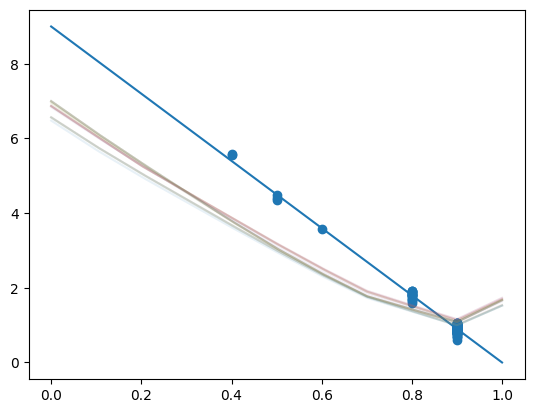

In [135]:
# Regression on the bandit data
# plot the data
plt.scatter(X_data, Y_data)
print(dim)

B = 10.0
w_init = (np.ones(dim)/dim) * (B/2)
def log_post(w):
    return log_posterior(w, X_data, Y_data, T)
samples = hit_and_run_sampling(log_post, w_init, n_samples=20, B=B, burn_in=10000, step_scale=10.0, random_state=42)

x = np.linspace(0, 1, 1000)
y = [true_f(xi) for xi in x]
plt.plot(x, y)
for w in samples:
    f = mixture(w)
    y = [f(xi) for xi in x]
    plt.plot(x, y, alpha=0.1)
plt.show()